<a href="https://colab.research.google.com/github/flaviasmarques/R4_TREAD_COVID19/blob/master/R4_AnaliseExploratoria_Covid_e_Mundo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabalhar com os dados do COVID Mundo

Parte 1 - Limpeza e analise dos Dataset extraidos no site: https://ourworldindata.org/coronavirus-source-data

In [1]:
# Importando as bibliotecas:
import pandas as pd
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import numpy as np 
# Biblioteca para trabalhar com mapas:
#!pip install folium

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Subir do Dataframe para o Python - Deve escolher o doc.
from google.colab import files
uploaded = files.upload()

Saving owid-covid-data.csv to owid-covid-data (1).csv


In [3]:
# dataframe covid_mund ver os dados  
!head owid-covid-data.csv

iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,,0.0,0.0,,0.0,0.0,,0.0,0.0,,,,,,,,,,,,38928341.0,54.422,18.6,2.581,1.337,1803.987,,597.029,9.59,,,37.746,0.5,64.83,0.498
AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,,0.0,0.0,,0.0,0.0,,0.0,0.0,,,,,,,,,,,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,

In [4]:
# Carregando a base de dados e inserir o nome dataset no Dataframe:
dataset = pd.read_csv("owid-covid-data.csv",sep=',', parse_dates=['date'], low_memory=False)    


In [5]:
#para identificar o tipo
type(dataset)

pandas.core.frame.DataFrame

In [6]:
#Para ver se o PANDA identificou os dados no momento da leitura do dataframe corretamente
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44101 entries, 0 to 44100
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   iso_code                         44101 non-null  object        
 1   continent                        43839 non-null  object        
 2   location                         44101 non-null  object        
 3   date                             44101 non-null  datetime64[ns]
 4   total_cases                      43498 non-null  float64       
 5   new_cases                        43498 non-null  float64       
 6   new_cases_smoothed               42715 non-null  float64       
 7   total_deaths                     43498 non-null  float64       
 8   new_deaths                       43498 non-null  float64       
 9   new_deaths_smoothed              42715 non-null  float64       
 10  total_cases_per_million          43498 non-null  float64  

In [7]:
#Ver o dataframe como tabela
dataset.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,4.349800e+04,43498.000000,42715.000000,43498.000000,43498.000000,42715.000000,43498.000000,43498.000000,42715.000000,43498.000000,43498.000000,42715.000000,1.547100e+04,1.583800e+04,15838.000000,15471.000000,1.735500e+04,17355.000000,15939.000000,16322.000000,36727.000000,4.410100e+04,42104.000000,39580.000000,38994.000000,39375.000000,39076.000000,26078.000000,39595.000000,40980.000000,31076.000000,30685.000000,18474.000000,35809.000000,43549.000000,38200.000000
mean,9.239723e+04,1374.874201,1360.725284,3858.612718,43.279576,43.330137,1747.975313,23.272756,22.917066,54.710332,0.560111,0.560304,2.172860e+04,1.354996e+06,47.286550,0.660231,2.092631e+04,0.637822,179.768278,0.063544,57.703358,8.926926e+07,361.644288,31.368158,9.284794,5.874615,20996.014642,12.012164,251.303068,8.048725,10.837827,32.637056,52.598454,3.116392,74.058129,0.725726
std,9.541763e+05,12529.331155,12312.530040,35893.741284,366.364575,356.243986,3762.747098,71.840085,55.166973,139.918876,3.056784,1.935947,8.848518e+04,6.012036e+06,86.125185,1.117942,8.142093e+04,1.011280,927.329822,0.089709,27.741199,6.162516e+08,1662.323574,9.021720,6.326748,4.321729,20473.589077,19.145756,117.635895,4.142327,10.482514,13.406743,31.575217,2.531142,7.362855,0.152647
min,0.000000e+00,-8261.000000,-552.000000,0.000000,-1918.000000,-232.143000,0.000000,-2212.545000,-269.978000,0.000000,-67.901000,-9.678000,-3.743000e+03,1.000000e+00,0.000000,-0.398000,0.000000e+00,0.000000,1.535000,0.000000,0.000000,8.090000e+02,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,5.000000e+01,0.000000,0.571000,0.000000,0.000000,0.000000,24.099750,0.000000,0.120000,0.000000,0.000000,0.000000,9.420000e+02,4.261700e+04,2.511000,0.059000,1.046000e+03,0.062000,12.145000,0.008000,38.890000,1.402985e+06,39.497000,23.500000,3.556000,2.142000,5338.454000,0.500000,153.507000,5.310000,1.900000,21.400000,21.222000,1.300000,69.910000,0.606000
50%,9.390000e+02,9.000000,14.000000,17.000000,0.000000,0.143000,264.577000,1.447000,2.805000,4.545500,0.000000,0.018000,3.142000e+03,1.762050e+05,13.241000,0.273000,3.544000e+03,0.296000,34.051000,0.028000,64.350000,8.654618e+06,88.125000,31.400000,6.986000,4.419000,14103.452000,1.800000,238.339000,7.110000,6.400000,31.400000,55.182000,2.500000,75.490000,0.755000
75%,9.917250e+03,155.000000,159.429000,212.750000,3.000000,2.857000,1756.111750,16.219500,17.899500,33.072000,0.196000,0.274000,1.164150e+04,6.867575e+05,54.948000,0.797000,1.231650e+04,0.799500,109.661500,0.080000,79.630000,3.107294e+07,214.243000,39.700000,14.762000,9.473000,32415.132000,16.000000,318.949000,10.180000,19.600000,40.900000,83.741000,4.200000,79.930000,0.853000
max,2.990249e+07,310156.000000,286047.714000,941291.000000,10467.000000,7459.143000,42501.371000,4944.376000,882.924000,1237.551000,215.382000,63.140000,1.236993e+06,9.805313e+07,837.012000,16.574000,1.098274e+06,12.502000,47299.000000,0.651000,100.000000,7.794799e+09,19347.500000,48.200000,27.049000,18.493000,116935.600000,77.600000,724.417000,23.360000,44.000000,78.100000,98.999000,13.800000,86.750000,0.953000


In [8]:
# Visualizando as 5 primeiras linhas do Dataframe:
dataset.head().T

,0,1,2,3,4
iso_code,AFG,AFG,AFG,AFG,AFG
continent,Asia,Asia,Asia,Asia,Asia
location,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan
date,2019-12-31 00:00:00,2020-01-01 00:00:00,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-04 00:00:00
total_cases,0,0,0,0,0
new_cases,0,0,0,0,0
new_cases_smoothed,NaN,NaN,NaN,NaN,NaN
total_deaths,0,0,0,0,0
new_deaths,0,0,0,0,0
new_deaths_smoothed,NaN,NaN,NaN,NaN,NaN


In [9]:
#Gráfico para medir o grau de correlação entre as variáveis com Total dos cases(casos) como referencia, com todas as variaveis do dataset.
#Mostrando como fica poluido se não for realizado a analise exploratória antes da extração dos dados. 
df = dataset.drop('total_cases',axis=1)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

In [10]:
# Criar um novo dataset para realizar a analise antes da limpeza das variaveis. 
dataset1 = dataset

In [11]:
# Visualizando as colunas para verificar as que serão realizadas limpezas
list(dataset1)

['iso_code',
 'continent',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'new_tests',
 'total_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'tests_per_case',
 'positive_rate',
 'tests_units',
 'stringency_index',
 'population',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'gdp_per_capita',
 'extreme_poverty',
 'cardiovasc_death_rate',
 'diabetes_prevalence',
 'female_smokers',
 'male_smokers',
 'handwashing_facilities',
 'hospital_beds_per_thousand',
 'life_expectancy',
 'human_development_index']

In [22]:
#Limpeza de dados com drop das colunas que não serão utilizadas
dataset1.drop('new_cases_smoothed', inplace=True, axis=1)
dataset1.drop('new_deaths', inplace=True, axis=1)
dataset1.drop('new_deaths_smoothed', inplace=True, axis=1)
dataset1.drop('total_cases_per_million', inplace=True, axis=1)
dataset1.drop('new_cases_per_million', inplace=True, axis=1)
dataset1.drop('total_deaths_per_million', inplace=True, axis=1)
dataset1.drop('new_deaths_per_million', inplace=True, axis=1)
dataset1.drop('new_deaths_smoothed_per_million', inplace=True, axis=1)
dataset1.drop('new_tests', inplace=True, axis=1)
dataset1.drop('total_tests_per_thousand', inplace=True, axis=1)
dataset1.drop('new_tests_per_thousand', inplace=True, axis=1)
dataset1.drop('new_tests_smoothed', inplace=True, axis=1)
dataset1.drop('new_tests_smoothed_per_thousand', inplace=True, axis=1) 
dataset1.drop('tests_per_case', inplace=True, axis=1) 
dataset1.drop('positive_rate', inplace=True, axis=1) 
dataset1.drop('tests_units', inplace=True, axis=1)
dataset1.drop('stringency_index', inplace=True, axis=1)
dataset1.drop('cardiovasc_death_rate', inplace=True, axis=1)
dataset1.drop('diabetes_prevalence', inplace=True, axis=1)
dataset1.drop('population_density', inplace=True, axis=1)
dataset1.drop('gdp_per_capita', inplace=True, axis=1)
dataset1.drop('extreme_poverty', inplace=True, axis=1)
dataset1.drop('handwashing_facilities', inplace=True, axis=1)
dataset1.drop('hospital_beds_per_thousand', inplace=True, axis=1)
dataset1.drop('life_expectancy', inplace=True, axis=1)
dataset1.drop('human_development_index', inplace=True, axis=1)
dataset1.drop('handwashing_facilities', inplace=True, axis=1)
dataset1.drop('hospital_beds_per_thousand', inplace=True, axis=1)
dataset1.drop('cardiovasc_death_rate', inplace=True, axis=1)
dataset1.drop('diabetes_prevalence', inplace=True, axis=1)

In [29]:
# Visualizando se excluiu as colunas e ver as colunas que ficaram
list(dataset1)

['iso_code',
 'Continente',
 'Pais',
 'Data',
 'Total_Casos',
 'Novos_Casos',
 'Total_Mortes',
 'Total_Testes',
 'População',
 'Menor_65_anos',
 'Maior_65_anos',
 'Maior_70_anos',
 'fumantes_femininos',
 'fumantes_masculinos']

In [30]:
#Renomear as colunas para Portugues
dataset1.rename(columns={ 'continent':'Continente','location':'Pais','date':'Data','total_cases':'Total_Casos',
                         'new_cases':'Novos_Casos','total_deaths':'Total_Mortes','total_tests':'Total_Testes',
                         'population':'População','median_age':'Menor_65_anos','aged_65_older':'Maior_65_anos',
                         'aged_70_older':'Maior_70_anos', 'male_smokers':'fumantes_masculinos',
                         'female_smokers':'fumantes_femininos'},inplace = True)

In [31]:
# Visualizando se excluiu as colunas e ver as colunas que ficaram
list(dataset1)

['iso_code',
 'Continente',
 'Pais',
 'Data',
 'Total_Casos',
 'Novos_Casos',
 'Total_Mortes',
 'Total_Testes',
 'População',
 'Menor_65_anos',
 'Maior_65_anos',
 'Maior_70_anos',
 'fumantes_femininos',
 'fumantes_masculinos']

In [35]:
#AGORA SIM o Gráfico para medir o grau de correlação entre as variáveis com Total dos cases(casos). 
#Correlação positiva entre as variaveis indica 1, correlação negativa entre as variaveis indica -1 e se não exister uma correlação entre essas variáveis indica 0.
df = dataset1.drop('Total_Casos',axis=1)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Novos_Casos,Total_Mortes,Total_Testes,População,Menor_65_anos,Maior_65_anos,Maior_70_anos,fumantes_femininos,fumantes_masculinos
Novos_Casos,1.000000,0.960156,0.753071,0.706653,0.011734,0.004953,0.001904,-0.021503,-0.017599
Total_Mortes,0.960156,1.000000,0.829360,0.679248,0.032614,0.033271,0.032104,0.002930,-0.016764
Total_Testes,0.753071,0.829360,1.000000,0.361011,0.070546,0.066398,0.063248,0.063617,0.007943
População,0.706653,0.679248,0.361011,1.000000,0.000355,-0.012773,-0.017950,-0.072125,0.022654
Menor_65_anos,0.011734,0.032614,0.070546,0.000355,1.000000,0.911355,0.896823,0.680428,0.187517
Maior_65_anos,0.004953,0.033271,0.066398,-0.012773,0.911355,1.000000,0.994267,0.775370,0.083840
Maior_70_anos,0.001904,0.032104,0.063248,-0.017950,0.896823,0.994267,1.000000,0.779229,0.084636
fumantes_femininos,-0.021503,0.002930,0.063617,-0.072125,0.680428,0.775370,0.779229,1.000000,0.171897
fumantes_masculinos,-0.017599,-0.016764,0.007943,0.022654,0.187517,0.083840,0.084636,0.171897,1.000000


In [32]:
#Criar um novo dataframe para ver as linhas is null
faltantes = dataset1.isnull().sum
print(faltantes)

<bound method DataFrame.sum of        iso_code  Continente  ...  fumantes_femininos  fumantes_masculinos
0         False       False  ...                True                 True
1         False       False  ...                True                 True
2         False       False  ...                True                 True
3         False       False  ...                True                 True
4         False       False  ...                True                 True
...         ...         ...  ...                 ...                  ...
44096     False        True  ...               False                False
44097     False        True  ...               False                False
44098     False        True  ...               False                False
44099     False        True  ...               False                False
44100     False        True  ...               False                False

[44101 rows x 14 columns]>


In [19]:
 #Como transformar em zeros dados is null utilizando um novo dataframe 
datasetSemNull = dataset1[[ 'Total_Casos', 'Novos_Casos', 'Total_Mortes', 'Total_Testes', 'População', 
                           'Menor_65_anos', 'Maior_65_anos', 'Maior_70_anos', 'fumantes_femininos', 'fumantes_masculinos']].fillna(0)

In [49]:
#Ver o dataframe como dataframe de testes
datasetSemNull.describe()

,Total_Casos,Novos_Casos,Total_Mortes,Total_Testes,População,Menor_65_anos,Maior_65_anos,Maior_70_anos,fumantes_femininos,fumantes_masculinos
count,4.410100e+04,44101.000000,44101.000000,4.410100e+04,4.410100e+04,44101.000000,44101.000000,44101.000000,44101.000000,44101.000000
mean,9.113387e+04,1356.075327,3805.853291,4.866201e+05,8.926926e+07,28.152461,8.209593,5.245073,7.636931,22.708512
std,9.476911e+05,12444.400935,35650.317003,3.660965e+06,6.162516e+08,12.789811,6.649774,4.469658,10.093292,18.722394
min,0.000000e+00,-8261.000000,0.000000,0.000000e+00,8.090000e+02,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.900000e+01,0.000000,0.000000,0.000000e+00,1.402985e+06,19.800000,3.002000,1.756000,0.000000,0.000000
50%,8.890000e+02,9.000000,16.000000,0.000000e+00,8.654618e+06,29.600000,6.018000,3.437000,2.000000,23.600000
75%,9.513000e+03,149.000000,204.000000,6.316300e+04,3.107294e+07,38.700000,14.178000,8.678000,13.000000,37.400000
max,2.990249e+07,310156.000000,941291.000000,9.805313e+07,7.794799e+09,48.200000,27.049000,18.493000,44.000000,78.100000


In [66]:
#Analisando por Continente e total de casos
dataset1.groupby('Continente')['Total_Casos'].count()

Continente
Africa           10141
Asia             10500
Europe           11577
North America     6838
Oceania           1596
South America     2584
Name: Total_Casos, dtype: int64

In [73]:
#Analisando por Continente e total de casos
dataset1.groupby('Continente')['Menor_65_anos'].count()

Continente
Africa           10278
Asia             10665
Europe            9501
North America     4921
Oceania           1484
South America     2469
Name: Menor_65_anos, dtype: int64

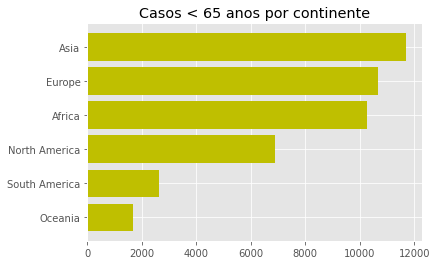

In [82]:
#Vamos plotar um gráfico para os casos de pessoas com óbitos
fig, ax = plt.subplots()

y_pos = np.arange(len(dataset1['Continente'].value_counts()[:20]))
values = dataset1['Continente'].value_counts()[:20]
segmentos = dataset1['Continente'].unique()[:20]

ax.barh(y_pos, values, align='center', color='y') 
ax.set_yticks(y_pos)
ax.set_yticklabels(segmentos)
ax.invert_yaxis()
#ax.set_xlabel('Casos < 65 anos')
ax.set_title('Casos < 65 anos por continente')

plt.show()

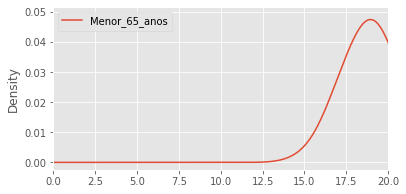

In [83]:
#Avaliando o quantitativo de casos com mais de 65 anos das pessoas que foram contabinadas
dataset1.plot.density(y='Menor_65_anos',xlim=[0,20],figsize=[6,3])


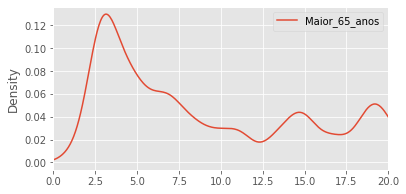

In [84]:
#Avaliando o quantitativo de casos com mais de 65 anos das pessoas que foram contabinadas
dataset1.plot.density(y='Maior_65_anos',xlim=[0,20],figsize=[6,3])

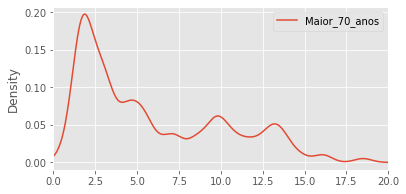

In [85]:
#Avaliando o quantitativo de casos com mais de 70 anos das pessoas que foram contabinadas
dataset1.plot.density(y='Maior_70_anos',xlim=[0,20],figsize=[6,3])

In [86]:
#Filtrar por location(pais) o quantitativo de linhas do pais Afghanistan 
dataset1[dataset1['Pais'] == 'Angola']['Pais'].value_counts()

Angola    180
Name: Pais, dtype: int64

In [87]:
#Filtrar por location(pais) o quantitativo de linhas do pais Brazil 
dataset1[dataset1['Pais'] == 'Brazil']['Pais'].value_counts()

Brazil    262
Name: Pais, dtype: int64

In [88]:
#Analisar os dados da coluna continent(continente)
dataset1['Continente'].unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania', nan], dtype=object)

In [89]:
#Criando lista de Continente excluindo as duplicações- Parte 1
ContNomes1 = dataset1.Continente.drop_duplicates()
print(ContNomes1)

0                 Asia
262             Europe
455             Africa
1091     North America
1448     South America
2114           Oceania
43839              NaN
Name: Continente, dtype: object


In [90]:
#Criando lista de Continente - Final
ContNomes = list(ContNomes1)
print(ContNomes)

['Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania', nan]


In [91]:
#Fazer um group by por continent(continente) sem filtrar nenhuma variavel
dataset1.groupby('Continente')['Continente'].count()

Continente
Africa           10278
Asia             10665
Europe           11712
North America     6893
Oceania           1655
South America     2636
Name: Continente, dtype: int64

In [92]:
#Fazer um group by por continent(continente) filtrando pela variavel 'Total Casos'
#Criando os valores da lista de Total Casos x Continente - Parte 1
ContVlr1 = dataset1.groupby('Continente')['Total_Casos'].count()
ContVlr1

Continente
Africa           10141
Asia             10500
Europe           11577
North America     6838
Oceania           1596
South America     2584
Name: Total_Casos, dtype: int64

In [93]:
#Criando os valores da lista de Total Casos x Continente - Final
ContVlr = list(ContVlr1)
ContVlr

[10141, 10500, 11577, 6838, 1596, 2584]

In [94]:
#Criando uma variavel X para filtrar no dataframe por total de casos filtando por continente que seja maior que zero[
#Dar para verificar que existe uma pequena diferença ao fitlrar com total de casos e maior que zero
x = dataset1.groupby('Continente')['Continente'].count()

x = x[x > 20]

df = dataset1[dataset1['Continente'].isin(x.keys())]
df = df[df['Total_Casos']>0]
x1 = df.groupby('Continente')['Continente'].count()
x1

Continente
Africa            9979
Asia              9394
Europe           10240
North America     6669
Oceania           1512
South America     2466
Name: Continente, dtype: int64

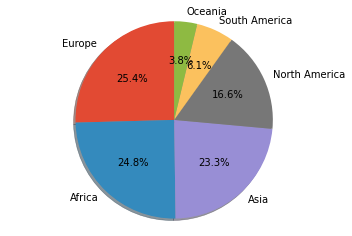

<Figure size 864x864 with 0 Axes>

In [105]:
#Gerando Grafico de PIZZA percentual de casos por Continente
#Utilizando a biblioteca matplotlib.pyplot as plt

# Analise por Continente:
labels = 'Europe', 'Africa', 'Asia', 'North America', 'South America', 'Oceania'
sizes = [10240, 9979, 9394, 6669, 2466, 1512]

fig1, ax1 = plt.subplots()
plt.figure(figsize=(12,12))  
#pie.title("Percentual por casos de COVID por continente")
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

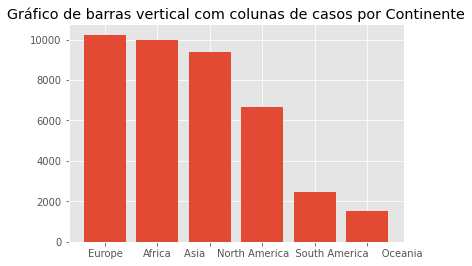

In [139]:
#Plotando gráfico de barras verticais o gráfico de colunas de casos por Continente:
grupos = ['Europe', 'Africa', 'Asia          ', 'North America      ', '           South America', '                      Oceania']
valores = [10240, 9979, 9394, 6669, 2466, 1512]
plt.bar(grupos, valores)
plt.title("Gráfico de barras vertical com colunas de casos por Continente")
plt.show()

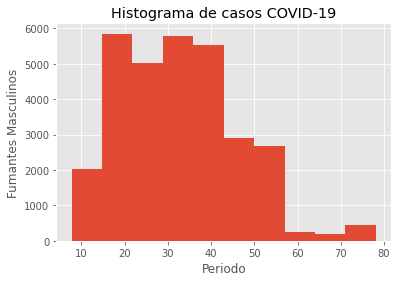

In [150]:
# Conclusão sumarizada analítica do histograma de novos casos:
dataset1.fumantes_masculinos.hist()
plt.xlabel ('Periodo')
plt.ylabel ('Fumantes Masculinos')
plt.title("Histograma de casos COVID-19")
plt.show()

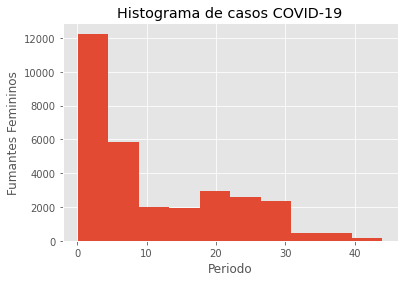

In [152]:
# Conclusão sumarizada analítica do histograma de novos casos:
dataset1.fumantes_femininos.hist()
plt.xlabel ('Periodo')
plt.ylabel ('Fumantes Femininos')
plt.title("Histograma de casos COVID-19")
plt.show()

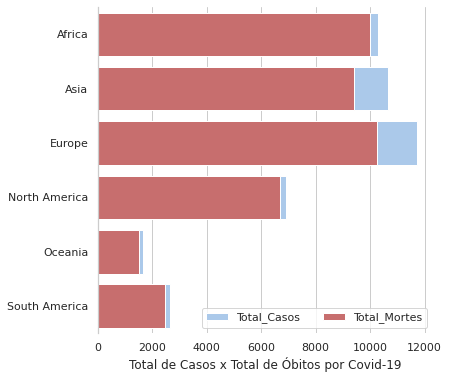

In [162]:
# Plotar Gráfico de total de casos x óbitos no Dataframe:
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(6,6 ))

sns.set_color_codes("pastel")
sns.barplot(x=x.values, y=x.keys(), label="Total_Casos", color="b")

sns.set_color_codes("muted")
sns.barplot(x=x1.values, y=x1.keys(),label="Total_Mortes", color="r")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="", xlabel="Total de Casos x Total de Óbitos por Covid-19")
sns.despine(left=False, bottom=True)

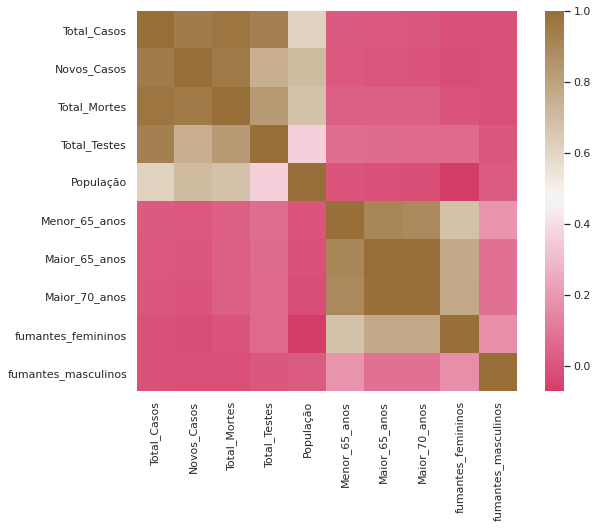

In [164]:
#Vamos visualizar a correlação entre as variáveis filtrando por total de cases com o gráfico abaixo:
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 7))
#dataset1 = dataset1('total_cases',axis=1)
corr = dataset1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(0, 50, as_cmap=True), square=True, ax=ax)

Inicio da Analise Visualização com Mapas



In [165]:
#Necessário baixar as Bibliotecas e variaveis abaixo
!pip install plotly==4.5.2
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.express as px

     |████████████████████████████████| 7.1MB 2.7MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [166]:
completo = dataset1[dataset1['Data'] == max(dataset1['Data'])]

In [167]:
#Excluir todas as LInhas com os dados World na coluna Pais
completo.drop(completo[completo.Pais == 'World'].index, inplace=True)

In [168]:
#Verificar se as linhas foram excluida da coluna Pais igual a 'World'
completo[completo.Pais == 'World'].index

Int64Index([], dtype='int64')

In [169]:
# Plota Painel 1
fig = px.treemap(completo.sort_values(by='Total_Casos', ascending=False).reset_index(drop=True), 
                 path=["Pais"],
                         #    path=["Country/Region", "Province/State"],
                 values="Total_Casos",
                 height=600,
                 title='Painel de Número de Casos Confirmadas por País- COVID-19',
                 color_discrete_sequence = px.colors.qualitative.Dark2)
fig.data[0].textinfo = 'label+text+value'
fig.show()

In [170]:
# Plota Painel 2
fig = px.treemap(completo.sort_values(by='Total_Mortes', ascending=False).reset_index(drop=True), 
                 path=["Pais","Continente"],
                         #    path=["Country/Region", "Province/State"],
                 values="Total_Mortes",
                 height=600,
                 title='Painel de Número de Casos de Óbitos por País e Continente- COVID-19',
                 color_discrete_sequence = px.colors.qualitative.Dark2)
fig.data[0].textinfo = 'label+text+value'
fig.show()

In [171]:
# Plota Painel 2
fig = px.treemap(completo.sort_values(by='Novos_Casos', ascending=False).reset_index(drop=True), 
                 path=["Pais","Continente"],
                         #    path=["Country/Region", "Province/State"],
                 values="Novos_Casos",
                 height=600,
                 title='Painel de Número de Novos Casos por País e Continente- COVID-19',
                 color_discrete_sequence = px.colors.qualitative.Dark2)
fig.data[0].textinfo = 'label+text+value'
fig.show()

#trabalhando com COVID-19 mundo para plotar e mapa
### Dicionário de dados do Dataframe (Dataset2) - df2:
Province/State – Província ou Estado
Country/Region – País ou Região
Lat – Latitude
Long – Longitude
Date – Data
Comfirmed – Número de casos confirmados
Deaths – Número de mortes
Recovered – Número de recuperados

In [176]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [177]:
#Subir do Dataframe para o Python - Deve escolher o doc.
from google.colab import files
uploaded = files.upload()

Saving covid_19_clean_complete.csv to covid_19_clean_complete.csv


In [178]:
# Lendo o arquivo covid_19_clean_complete
!head covid_19_clean_complete.csv

Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
,Afghanistan,33.0,65.0,1/22/20,0,0,0
,Albania,41.1533,20.1683,1/22/20,0,0,0
,Algeria,28.0339,1.6596,1/22/20,0,0,0
,Andorra,42.5063,1.5218,1/22/20,0,0,0
,Angola,-11.2027,17.8739,1/22/20,0,0,0
,Antigua and Barbuda,17.0608,-61.7964,1/22/20,0,0,0
,Argentina,-38.4161,-63.6167,1/22/20,0,0,0
,Armenia,40.0691,45.0382,1/22/20,0,0,0
Australian Capital Territory,Australia,-35.4735,149.0124,1/22/20,0,0,0


In [179]:
#Criando o novo dataframe dataset2 e vendo as 10 primeiras linhas do arquivo
df2 = pd.read_csv("covid_19_clean_complete.csv",sep=',', parse_dates=['Date'], low_memory=False)  
df2.head(10)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0
5,NaN,Antigua and Barbuda,17.0608,-61.7964,2020-01-22,0,0,0
6,NaN,Argentina,-38.4161,-63.6167,2020-01-22,0,0,0
7,NaN,Armenia,40.0691,45.0382,2020-01-22,0,0,0
8,Australian Capital Territory,Australia,-35.4735,149.0124,2020-01-22,0,0,0
9,New South Wales,Australia,-33.8688,151.2093,2020-01-22,0,0,0


In [180]:
#Para ver se o PANDA identificou os dados no momento da leitura do dataframe
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19836 entries, 0 to 19835
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  6080 non-null   object        
 1   Country/Region  19836 non-null  object        
 2   Lat             19836 non-null  float64       
 3   Long            19836 non-null  float64       
 4   Date            19836 non-null  datetime64[ns]
 5   Confirmed       19836 non-null  int64         
 6   Deaths          19836 non-null  int64         
 7   Recovered       19836 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 1.2+ MB


In [181]:
#Renomear as colunas
df2.rename(columns={'Province/State':'Provincia_Estado','Country/Region':'Pais','Date':'Data','Lat':'Latitude','Long':'Longitude','Confirmed':'Total_Casos_Confirmados','Deaths':'Total_Mortes','Recovered':'total_Casos_Recuperados','Active':'Ativo'},inplace = True)

In [182]:
#Visualizar a alteração do nome dos campos
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19836 entries, 0 to 19835
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Provincia_Estado         6080 non-null   object        
 1   Pais                     19836 non-null  object        
 2   Latitude                 19836 non-null  float64       
 3   Longitude                19836 non-null  float64       
 4   Data                     19836 non-null  datetime64[ns]
 5   Total_Casos_Confirmados  19836 non-null  int64         
 6   Total_Mortes             19836 non-null  int64         
 7   total_Casos_Recuperados  19836 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 1.2+ MB


In [183]:
import warnings
warnings.filterwarnings('ignore')

In [184]:
# Casos ativos = Casos Confirmados - Mortes - Casos Recoperados
df2['Ativo'] = df2['Total_Casos_Confirmados'] - df2['Total_Mortes'] - df2['total_Casos_Recuperados']


In [185]:
# Subistituindo Mainland China por China
df2['Pais'] = df2['Pais'].replace('Mainland China', 'China')


In [186]:
# Preenchendo missing values 
df2[['Provincia_Estado']] = df2[['Provincia_Estado']].fillna('')
df2[['Total_Casos_Confirmados', 'Total_Mortes', 'total_Casos_Recuperados', 'Ativo']] = df2[['Total_Casos_Confirmados', 'Total_Mortes', 'total_Casos_Recuperados', 'Ativo']].fillna(0)

In [187]:
# Convertendo datatypes
df2['total_Casos_Recuperados'] = df2['total_Casos_Recuperados'].astype(int)

In [188]:
# imprimindo 5 primeiras linhas
df2.head()

,Provincia_Estado,Pais,Latitude,Longitude,Data,Total_Casos_Confirmados,Total_Mortes,total_Casos_Recuperados,Ativo
0,,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,0
1,,Albania,41.1533,20.1683,2020-01-22,0,0,0,0
2,,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0
3,,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0
4,,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0


In [189]:
#E#xaminando os dados temporais
df2.Data.describe()

count                   19836
unique                     76
top       2020-01-25 00:00:00
freq                      261
first     2020-01-22 00:00:00
last      2020-04-06 00:00:00
Name: Data, dtype: object

In [190]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19836 entries, 0 to 19835
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Provincia_Estado         19836 non-null  object        
 1   Pais                     19836 non-null  object        
 2   Latitude                 19836 non-null  float64       
 3   Longitude                19836 non-null  float64       
 4   Data                     19836 non-null  datetime64[ns]
 5   Total_Casos_Confirmados  19836 non-null  int64         
 6   Total_Mortes             19836 non-null  int64         
 7   total_Casos_Recuperados  19836 non-null  int64         
 8   Ativo                    19836 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 1.4+ MB


In [191]:
##Agrupando dados
# Obtem o numero de casos confirmados, mortes, recuperados e ativos agrupado por data e por região.
df_agrupado = df2.groupby(['Data', 'Pais'])['Total_Casos_Confirmados', 'Total_Mortes', 'total_Casos_Recuperados', 'Ativo'].sum().reset_index()

In [192]:
# Ordena o dataframe por mais casos confirmados
df_agrupado.sort_values(by='Total_Casos_Confirmados', ascending=False)

,Data,Pais,Total_Casos_Confirmados,Total_Mortes,total_Casos_Recuperados,Ativo
13971,2020-04-06,US,366614,10783,19581,336250
13787,2020-04-05,US,337072,9619,17448,310005
13603,2020-04-04,US,308850,8407,14652,285791
13419,2020-04-03,US,275586,7087,9707,258792
13235,2020-04-02,US,243453,5926,9001,228526
...,...,...,...,...,...,...
8756,2020-03-09,Mauritania,0,0,0,0
4967,2020-02-17,Zimbabwe,0,0,0,0
8754,2020-03-09,Mali,0,0,0,0
4968,2020-02-18,Afghanistan,0,0,0,0


In [193]:
# Obtem o numero de casos confirmados, mortes, recuperados e ativos agrupando por região.
df_group_paises = df2.groupby('Pais')['Total_Casos_Confirmados', 'Total_Mortes', 'total_Casos_Recuperados', 'Ativo'].sum().reset_index()

In [194]:
# ordena por paises com mais casos confirmados
df_group_paises.sort_values(by='Total_Casos_Confirmados', ascending=False)

,Pais,Total_Casos_Confirmados,Total_Mortes,total_Casos_Recuperados,Ativo
36,China,4683417,165756,2847170,1670491
171,US,2831915,64777,98681,2668457
84,Italy,1942859,206052,266247,1470560
156,Spain,1472568,123441,295573,1053554
65,Germany,1142172,12016,217756,912400
...,...,...,...,...,...
103,Malawi,19,0,0,19
166,Timor-Leste,16,0,0,16
181,Western Sahara,8,0,0,8
143,Sao Tome and Principe,4,0,0,4


In [195]:
# Agrupa quantidade de casos recuperados, mortes e ativos por data
temp = df2.groupby('Data')['total_Casos_Recuperados', 'Total_Mortes', 'Ativo'].sum().reset_index()

In [196]:
# Remodela o dataframe com variável e valor para ter quantidades de recuperados, mortos e ativos
temp = temp.melt(id_vars="Data", value_vars=['total_Casos_Recuperados', 'Total_Mortes', 'Ativo'],
                 var_name='Case', value_name='Count')

In [197]:
df2

,Provincia_Estado,Pais,Latitude,Longitude,Data,Total_Casos_Confirmados,Total_Mortes,total_Casos_Recuperados,Ativo
0,,Afghanistan,33.00000,65.000000,2020-01-22,0,0,0,0
1,,Albania,41.15330,20.168300,2020-01-22,0,0,0,0
2,,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0
3,,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0
4,,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0
...,...,...,...,...,...,...,...,...,...
19831,Falkland Islands (Islas Malvinas),United Kingdom,-51.79630,-59.523600,2020-04-06,2,0,0,2
19832,Saint Pierre and Miquelon,France,46.88520,-56.315900,2020-04-06,1,0,0,1
19833,,South Sudan,6.87700,31.307000,2020-04-06,1,0,0,1
19834,,Western Sahara,24.21550,-12.885800,2020-04-06,4,0,0,4


In [198]:
temp.head(4)

,Data,Case,Count
0,2020-01-22,total_Casos_Recuperados,28
1,2020-01-23,total_Casos_Recuperados,30
2,2020-01-24,total_Casos_Recuperados,36
3,2020-01-25,total_Casos_Recuperados,39


In [199]:
# habilita modo offline
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)


In [200]:
# Definindo o renderizador:
import plotly.io as pio
pio.renderers
pio.renderers.default = "colab"

In [201]:
# Cores
recuperados = '#21bf73'
mortes = '#ff2e63'
ativos = '#fe9801'

In [203]:
import numpy as np

In [204]:
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.express as px

In [205]:
!pip install plotly==4.5.2

In [206]:
# filtra os dados considerando o último dia da base de dados
completo = df2[df2['Data'] == max(df2['Data'])]

In [207]:
# imprime as 5 primeiras linhas
completo.head()

,Provincia_Estado,Pais,Latitude,Longitude,Data,Total_Casos_Confirmados,Total_Mortes,total_Casos_Recuperados,Ativo
19575,,Afghanistan,33.0000,65.0000,2020-04-06,367,11,18,338
19576,,Albania,41.1533,20.1683,2020-04-06,377,21,116,240
19577,,Algeria,28.0339,1.6596,2020-04-06,1423,173,90,1160
19578,,Andorra,42.5063,1.5218,2020-04-06,525,21,31,473
19579,,Angola,-11.2027,17.8739,2020-04-06,16,2,2,12


In [208]:
#Curva de contabinação de casos confirmados e mortes

fig = px.line(df_agrupado,
              x="Data",
              y="Total_Casos_Confirmados",
              color='Pais',
              height=700,
              title='Casos Confirmados',
              color_discrete_sequence = px.colors.qualitative.Dark2 )
fig.show()

fig = px.line(df_agrupado,
              x="Data",
              y="Total_Mortes",
              color='Pais',
              height=700,
              title='Óbitos Confirmadas',
              color_discrete_sequence = px.colors.qualitative.Dark2)
fig.show()

In [212]:
#Biblioteca plotar Mapas interativos
import folium

In [214]:
# Mapa de Choropleth é um mapa composto por polígonos coloridos. 
# É usado para representar variações espaciais de uma quantidade
fig = px.choropleth(df_agrupado,                                                   
                    locations="Pais",                                    
                    locationmode='country names',                                 
                    color=np.log(df_agrupado["Total_Casos_Confirmados"]),                        
                    hover_name='Pais',                                  
                    hover_data=["Total_Casos_Confirmados", "Total_Mortes"],                            
                    animation_frame=df_agrupado["Data"].dt.strftime('%d-%m-%Y'),  
                    title='Acompanhamento dos Casos por data',                            
                    color_continuous_scale=px.colors.sequential.Blues)          
fig.update_layout(autosize=False, width=1200, height=800)
fig.show()

In [215]:
# Mapa de Choropleth é um mapa composto por polígonos coloridos. 
# É usado para representar variações espaciais de uma quantidade
fig = px.choropleth(df_agrupado,                                                   
                    locations="Pais",                                    
                    locationmode='country names',                                 
                    color=np.log(df_agrupado["Total_Mortes"]),                        
                    hover_name='Pais',                                  
                    hover_data=["Total_Casos_Confirmados", "Total_Mortes"],                            
                    animation_frame=df_agrupado["Data"].dt.strftime('%d-%m-%Y'),  
                    title='Mortes ao longo do tempo',                             
                    color_continuous_scale=px.colors.sequential.Reds)          
fig.update_layout(autosize=False, width=1000, height=600)
fig.show()

In [211]:
#Gráfico com Folium
# Obtem os dados do último dia da base de dados
temp = df2[df2['Data'] == max(df2['Data'])]

In [216]:
m = folium.Map(location=[0, 0], tiles='cartodbpositron',
               min_zoom=1, max_zoom=4, zoom_start=1)

for i in range(0, len(temp)):
    folium.Circle(
        location=[temp.iloc[i]['Latitude'], temp.iloc[i]['Longitude']],
        color='Purple', fill='crimson',   #crimson
        tooltip =    '<li><bold>Casos COVID-19 - Mundo: '+
                     '<li><bold>Pais : '+str(temp.iloc[i]['Pais'])+
                 #   '<li><bold>Provincia_Estado : '+str(temp.iloc[i]['Provincia_Estado'])+
                    '<li><bold>Total_Casos_Confirmados : '+str(temp.iloc[i]['Total_Casos_Confirmados'])+
                    '<li><bold>Total_Mortes : '+str(temp.iloc[i]['Total_Mortes']),
        radius=int(temp.iloc[i]['Total_Casos_Confirmados'])**1.1).add_to(m)
m